# Module 6 Live Coding Assignment :
## Logistic Regression and Applying GLM
Vika Vijayanand

## Q1
#### Read the dataset “churn.csv” and save it in a variable called “df”. See the basic infor- mation about your data with “head()”, “info()”, “describe()”, “dtypes” and ”shape”.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [88]:
df = pd.read_csv("/Users/vika/Data_Science/churn.csv")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [90]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [92]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [93]:
df.shape


(7043, 21)

# Q2
#### Cast the variable ”TotalCharges” to a float. Make sure to use the argument errors=‘coerce’. Delete rows, including null values, and drop the “CustomerID” column. Replace relevant columns to integers. For “Gender”, use 1 for “Male” and 0 for “Female”. For the others, use 1 for “Yes” and 0 for “No”.

In [94]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [95]:
df.dropna(inplace = True)

In [96]:
df.drop(["customerID"], axis = 1, inplace = True)

In [97]:
df.gender = [1 if each  == "Male" else 0 for each in df.gender]

In [98]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [99]:
columns_to_convert = ['Partner', 
                      'Dependents' , 
                      'PhoneService',
                      'OnlineSecurity', 
                      'MultipleLines',
                      'OnlineBackup',
                      'DeviceProtection', 
                      'TechSupport', 
                      'StreamingTV', 
                      'StreamingMovies', 
                      'PaperlessBilling', 
                      'Churn']  
for column in columns_to_convert:
    df[column] = [1 if each  == "Yes" else 0 if each == "No" else -1 for each in df[column]]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


# Q3
#### Perform an univariate analysis for all categorical and continuous variables. Plot their distributions using histograms in seaborn. Then do a “pairplot” for the columns “tenure”, “MonthlyCharges” and “TotalCharges” with the hue=“Churn” in seaborn.

In [100]:
numeric_columns = df.select_dtypes(include = np.number).columns

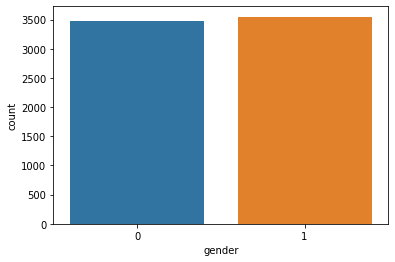

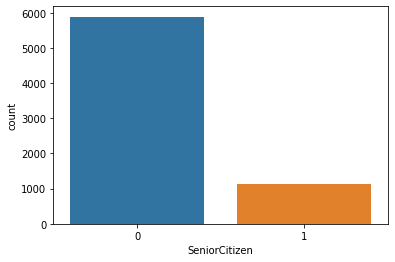

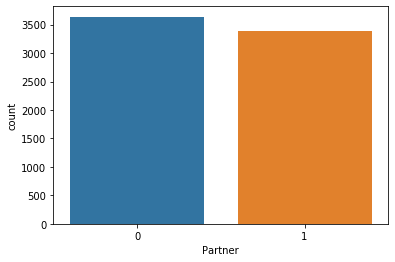

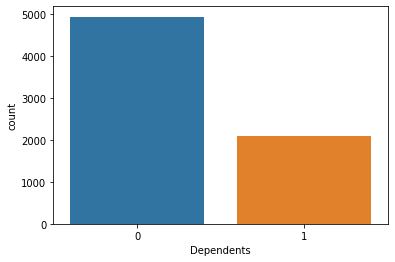

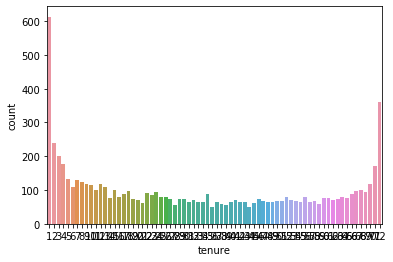

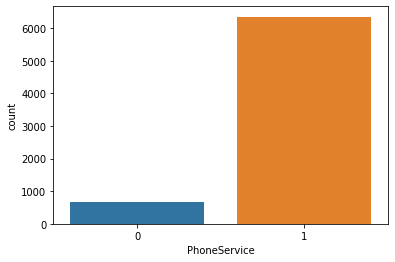

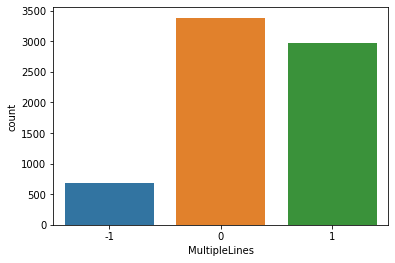

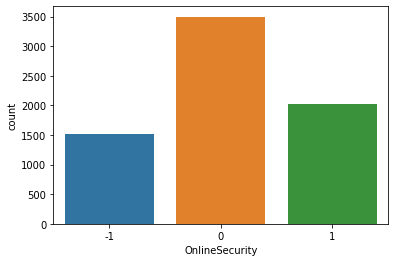

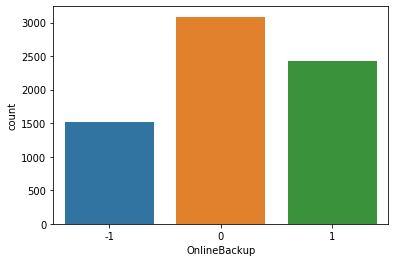

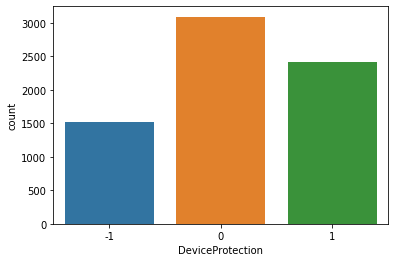

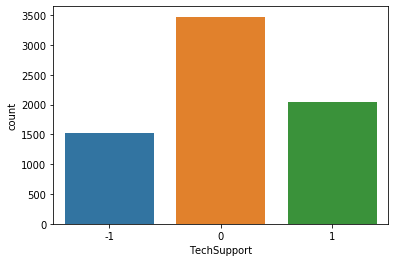

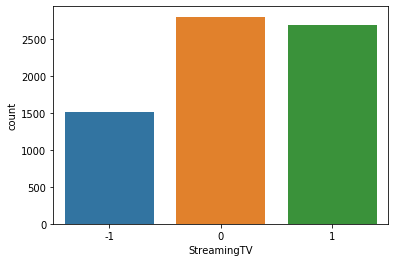

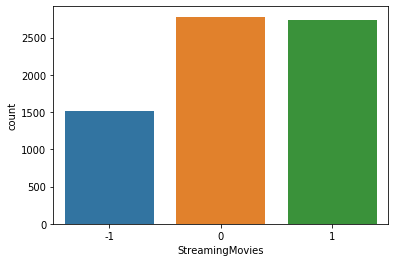

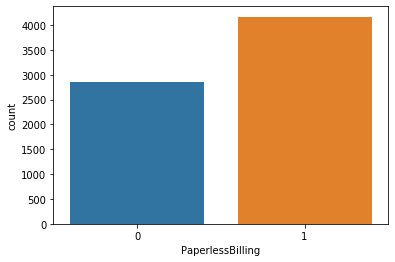

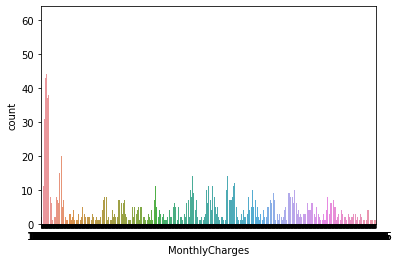

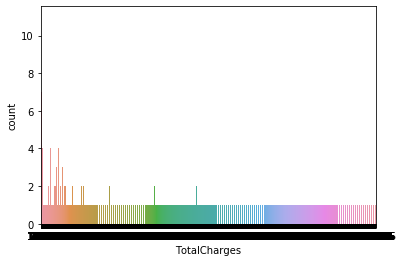

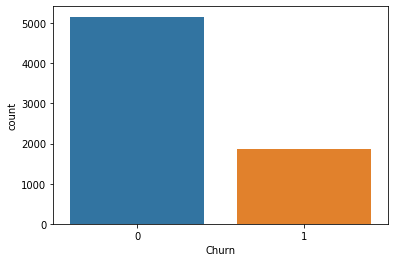

In [101]:
for column in numeric_columns:
    sns.countplot(column, data = df)
    plt.show()

In [102]:
object_columns = df.select_dtypes(include = np.object).columns
object_columns

Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')

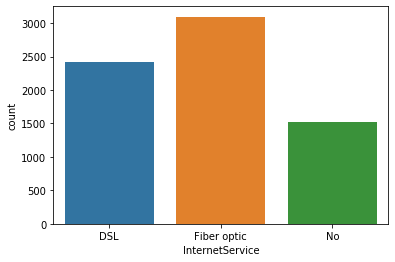

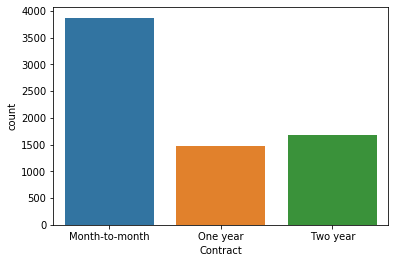

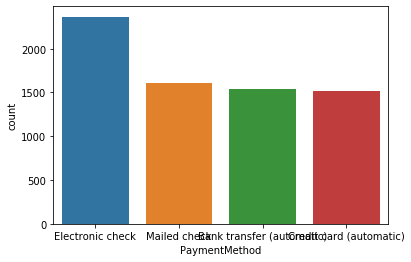

In [103]:
for column in object_columns:
    sns.countplot(column, data = df)
    plt.show()

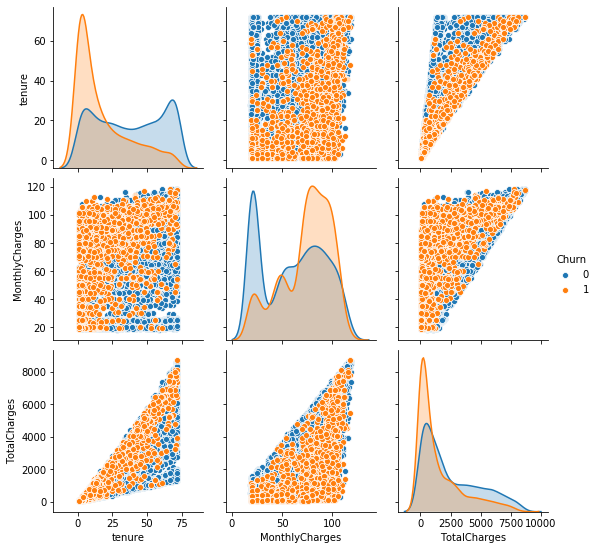

In [104]:
sns.pairplot(df, vars = ['tenure', 'MonthlyCharges', 'TotalCharges'], hue = "Churn")

# Q4 
#### Get and plot the correlation matrix between “Churn” and the remaining columns.

In [105]:
df.corr()['Churn'].sort_values()

tenure             -0.354049
TotalCharges       -0.199484
Dependents         -0.163128
Partner            -0.149982
gender             -0.008545
PhoneService        0.011691
OnlineSecurity      0.023014
TechSupport         0.026744
MultipleLines       0.036148
OnlineBackup        0.073934
DeviceProtection    0.084402
SeniorCitizen       0.150541
StreamingMovies     0.162672
StreamingTV         0.164509
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

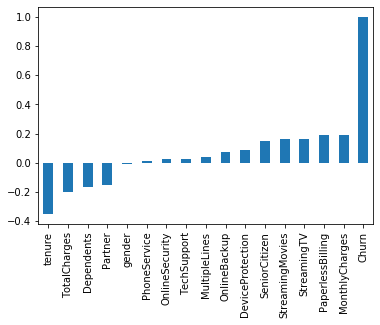

In [106]:
df.corr()['Churn'].sort_values().plot(kind= 'bar')

# Q5
#### Seperate X and y values. y would be our class which is “Churn” column in this dataset. X would be the remaining columns. Also, apply normalization to x in order to scale all values between 0 and 1

In [108]:
df = pd.get_dummies(data = df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [109]:
y = df.Churn.values

X = df.drop(['Churn'], axis = 1)

In [110]:
X = (X-np.min(X))/(np.max(X)).values

# Q6
#### Use the RFE method to get the best 8 variables for predicting the Churn. Make sure to transform the final data to only use those variables for predicting. Finally split the data set as train and test with %80-%20 ratio.

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [112]:
log_reg = LogisticRegression()
rfe = RFE(log_reg, n_features_to_select= 8)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=8, step=1, verbose=0)

In [113]:
X = rfe.fit_transform(X, y)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state =123)

# Q7
#### Build a logistic regression model using the selected variables from above. Fit it with your training data and then see the predictions in your test data. Get the accuracy for your model and plot the ROC curve for it.

In [116]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
accuracy_lr = log_reg.score(X_test, y_test)
print("logistic Regression accuracy is :", accuracy_lr)



logistic Regression accuracy is : 0.7960199004975125


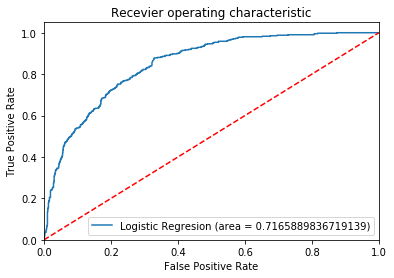

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regresion (area = {})'.format(logit_roc_auc))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Recevier operating characteristic')
plt.legend(loc= 'Lower right')
plt.show()